Multi-Class Classification - One vs All Classification

In [ ]:
# Imports 
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline

from sklearn import linear_model
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [13]:
X =  iris.data

Y = iris.target

In [8]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [10]:
iris_data = DataFrame(X, columns=['Sepal Length', 'Sepal width', 'Petal Length', 'Petal width'])

In [14]:
iris_target = DataFrame(Y, columns=['Species'])

In [15]:
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [16]:
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolour'
    else:
        return 'Virginica'

In [17]:
iris_target['Species'] =iris_target['Species'].apply(flower)

In [22]:
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [23]:
iris = pd.concat([iris_data,iris_target], axis = 1)

In [24]:
iris.head()

,Sepal Length,Sepal width,Petal Length,Petal width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


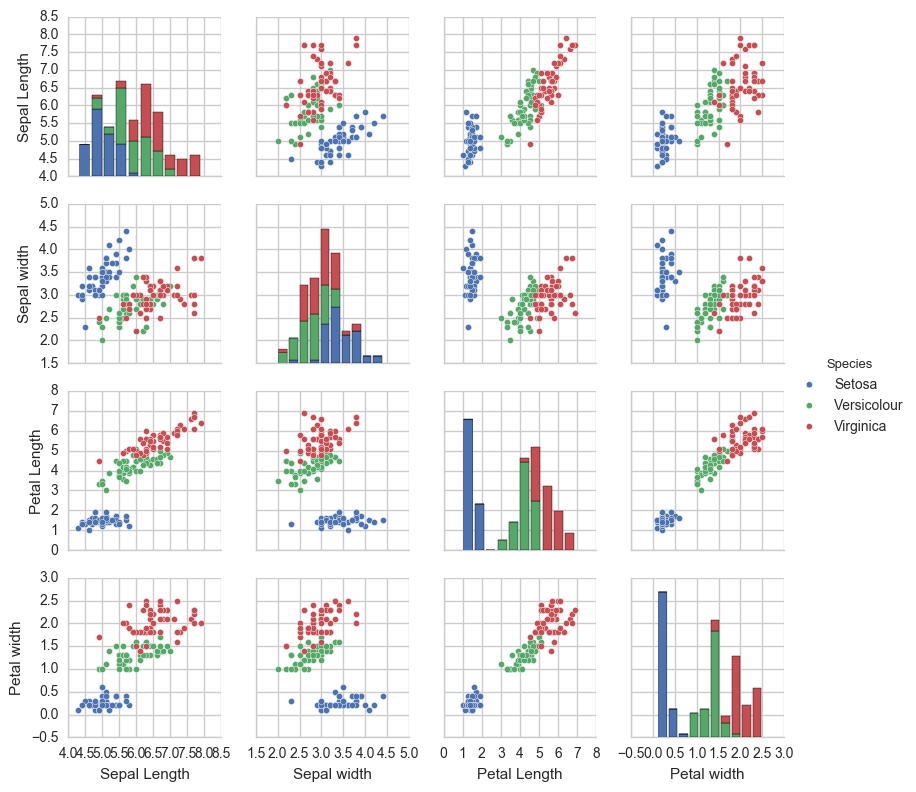

In [26]:
# seaborn works with only dataframe
sns.pairplot(iris, hue='Species', size=2)

In [27]:
# from the above graph we got that Setosa is quite unique from others.

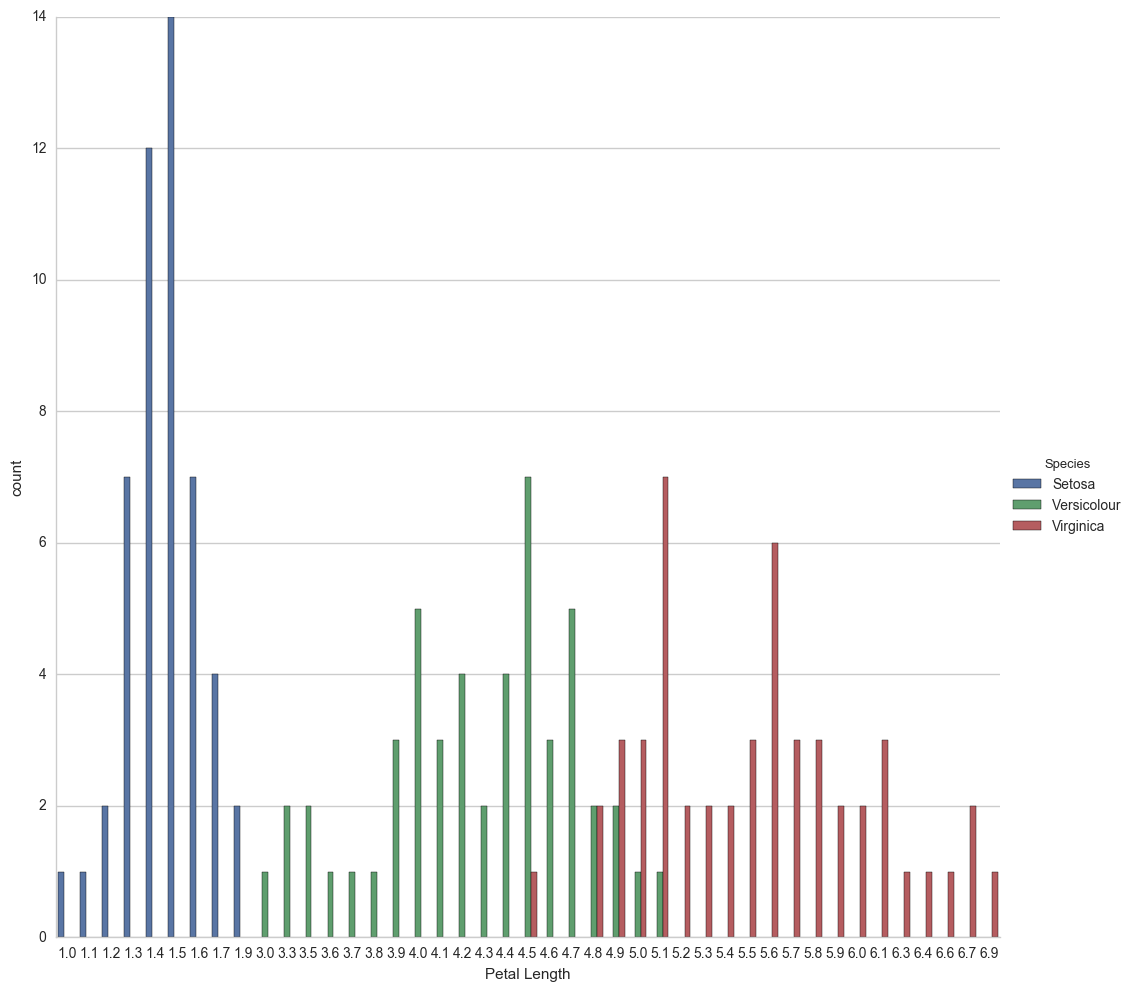

In [29]:
sns.factorplot('Petal Length',kind = 'count', data = iris, hue = "Species", size = 10)

In [30]:
# let's use Scikit learn 

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [34]:
log_reg = LogisticRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .40, random_state = 3)

In [35]:
log_reg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
from sklearn import metrics

In [38]:
Y_pred = log_reg.predict(X_test)

In [40]:
print metrics.accuracy_score(Y_test, Y_pred)

0.933333333333


In [41]:
# try changing your test_size to 30% to check if accuracy changes.

from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier(n_neighbors= 6)

In [44]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [45]:
Y_pred1 = knn.predict(X_test)

In [46]:
print metrics.accuracy_score(Y_test, Y_pred1)

0.95


In [48]:
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train, Y_train)
Y_pred2 = knn.predict(X_test)
print metrics.accuracy_score(Y_test, Y_pred2)

0.966666666667


In [49]:
# find K via elbow method.

k_range =range(1,21)

accuracy = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred2 = knn.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred2))

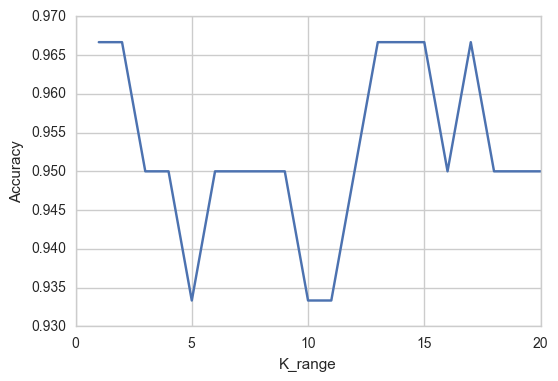

In [50]:
plt.plot(k_range, accuracy)
plt.xlabel('K_range')
plt.ylabel('Accuracy')